In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [4]:
print(X_train[100])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 25

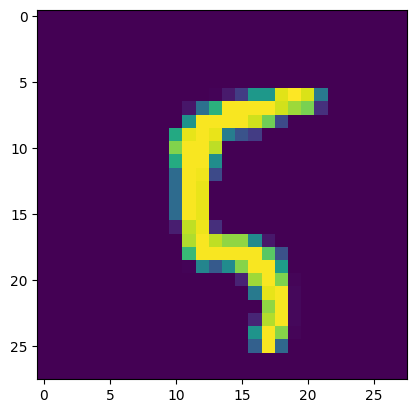

Label:  5


In [5]:
plt.imshow(X_train[100])
plt.show()

print("Label: ", Y_train[100])

In [6]:
X_train = X_train/255  #normalizing (values from 0 to 1)
X_test = X_test/255    #normalizing (values from 0 to 1)

In [7]:
print(X_train[100])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
class DNN(tf.keras.Model):
  def __init__(self, sizes):
    super (DNN, self). __init__()
    self.hidden_1 = sizes [0]
    self.hidden_2= sizes [1]
    self.output_layer_size = sizes [2]

    self.input_layer = tf.keras.layers.Flatten(input_shape=(28,28))
    self.hidden_layer1 = tf.keras.layers.Dense(self.hidden_1, activation='sigmoid')
    self.hidden_layer2 = tf.keras.layers.Dense(self.hidden_2, activation='sigmoid')
    self.output_layer= tf.keras.layers.Dense(self.output_layer_size, activation='softmax')

  def call(self, x_train):
    x = self.input_layer(x_train)
    x = self.hidden_layer1(x)
    x = self.hidden_layer2(x)
    x = self.output_layer(x)
    return x

In [9]:
model = DNN(sizes=[128,64,10])

In [10]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4605 - accuracy: 0.8845
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1792 - accuracy: 0.9477
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1243 - accuracy: 0.9636
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0930 - accuracy: 0.9727
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0724 - accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0574 - accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0457 - accuracy: 0.9868
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0371 - accuracy: 0.9893
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0296 - accuracy: 0.9919
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.024

In [12]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy: ", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0765 - accuracy: 0.9775
Accuracy:  0.9775000214576721


In [13]:
Y_pred = model.predict(X_test)
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

313/313 [==============================] - 1s 2ms/step
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1,

In [14]:
print(Y_test)

[7 2 1 ... 4 5 6]


In [15]:
conf_mat = tf.math.confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 965    0    3    1    1    1    4    2    3    0]
 [   0 1130    0    0    0    0    1    0    4    0]
 [   1    3 1014    1    2    0    2    5    4    0]
 [   0    1    6  987    0    1    0    6    8    1]
 [   1    0    2    1  966    0    2    1    2    7]
 [   2    2    0   14    2  855    5    1    9    2]
 [   1    3    2    1    4    2  940    1    4    0]
 [   1    8   11    3    2    0    0  997    2    4]
 [   3    0    2    2    4    2    2    2  956    1]
 [   2    5    0    8   14    6    0    6    3  965]], shape=(10, 10), dtype=int32)
